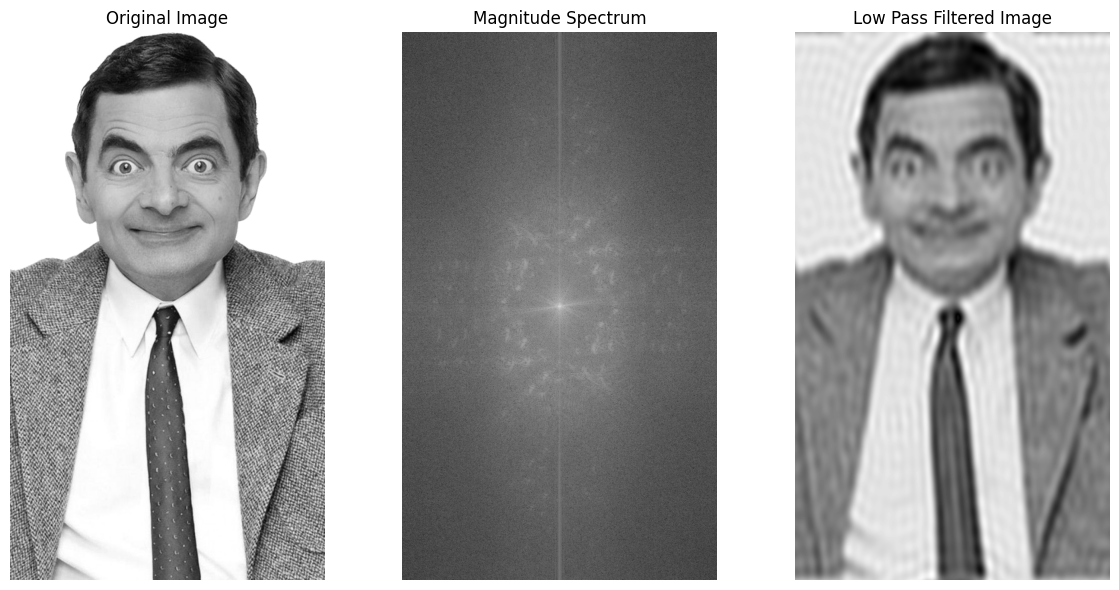

In [ ]:
#low pass filtering
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/mr.bean.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform Fast Fourier Transform (FFT)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)  # Shift the zero frequency component to the center

# Get the magnitude spectrum
magnitude_spectrum = np.log(np.abs(fshift) + 1)

# Create a low pass filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # center
d = 30  # Diameter of the circle (filter size)
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), d, 1, thickness=-1)  # Create a circular mask

# Apply the mask to the shifted FFT
fshift_filtered = fshift * mask

# Inverse FFT to get the image back
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_back, cmap='gray')
plt.title('Low Pass Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()


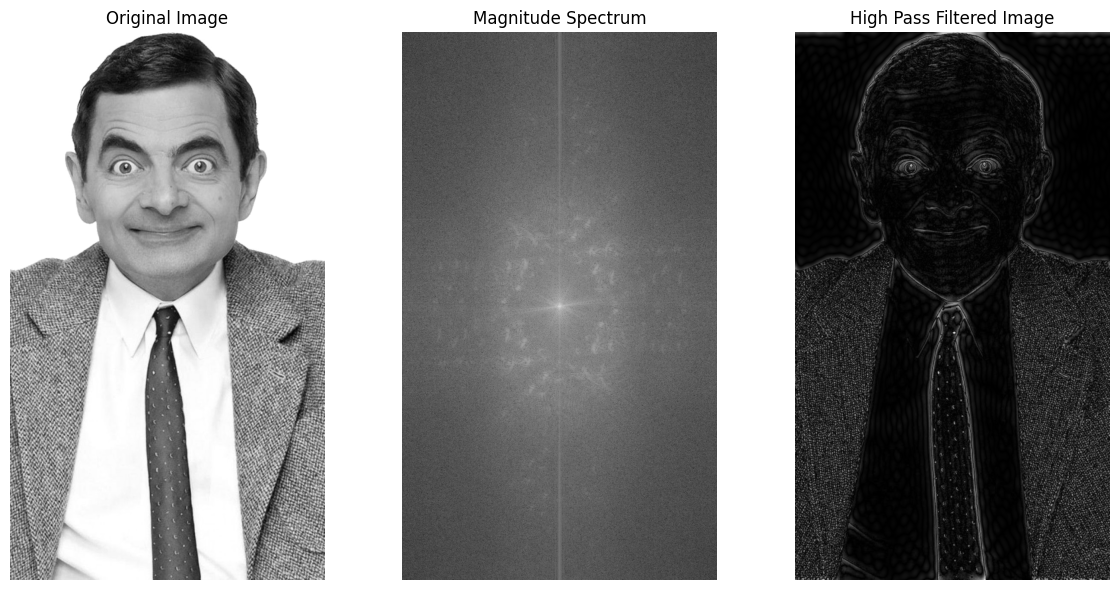

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/mr.bean.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform Fast Fourier Transform (FFT)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)  # Shift the zero frequency component to the center

# Get the magnitude spectrum
magnitude_spectrum = np.log(np.abs(fshift) + 1)

# Create a high pass filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # center
d = 30  # Diameter of the circle (filter size)
mask = np.ones((rows, cols), np.uint8)  # Start with all ones
cv2.circle(mask, (ccol, crow), d, 0, thickness=-1)  # Create a circular mask with zeros

# Apply the mask to the shifted FFT
fshift_filtered = fshift * mask

# Inverse FFT to get the image back
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_back, cmap='gray')
plt.title('High Pass Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()
